#**Artificial Neural Network (ANN)**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: January 2, 2020 (updated March 6, 2020)*

LSTM is a deep learning family. In this tutorial, we will use LSTM to perform hour-ahead load forecasting when historical load data are inputs to the forecasting model.

We will use keras library.




---


#**Step 1: Load Data**

Again, this notebook will work with "Bangkok.csv", the electrical consumption of a building at one-hour intervals for one year.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

In [23]:
url ='https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Bangkok.csv'
df = pd.read_csv(url, index_col=[0], parse_dates=[0])[['Load','Outdoor']]
df.head(5)
#We will parse the first column (col=[0]) as the index column as the date. 
#The 'Load' column will be saved in the dataframe df.
#Note: the 'Load' is in kilo-Watt (kW).

,Load,Outdoor
Time,,
2016-01-01 00:00:00,4.30,80.5
2016-01-01 01:00:00,4.12,79.2
2016-01-01 02:00:00,4.06,79.1
2016-01-01 03:00:00,4.44,79.0
2016-01-01 04:00:00,3.88,78.8


In [24]:
df['Lt-1'] = df['Load'].shift(1)
df['W']=df.index.dayofweek
df['H']=df.index.hour
df.head()

,Load,Outdoor,Lt-1,W,H
Time,,,,,
2016-01-01 00:00:00,4.30,80.5,NaN,4,0
2016-01-01 01:00:00,4.12,79.2,4.30,4,1
2016-01-01 02:00:00,4.06,79.1,4.12,4,2
2016-01-01 03:00:00,4.44,79.0,4.06,4,3
2016-01-01 04:00:00,3.88,78.8,4.44,4,4


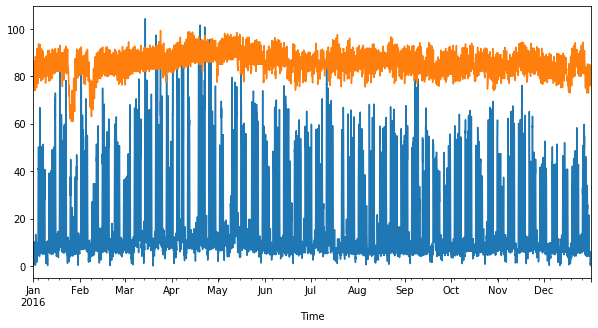

In [25]:
plt.figure(figsize=(10,5))
df['Load'].plot()
df['Outdoor'].plot()

#**Step 2: Prepare Data**

### **a) Normalize the dataset**

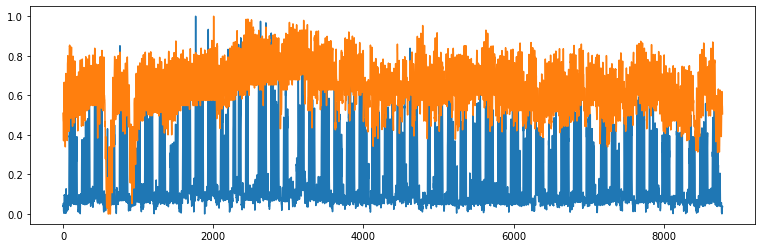

In [29]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(df)

plt.figure(figsize=(13,4))
plt.plot(data[:,0])
plt.plot(data[:,1])

Text(0.5, 0, 'Time (hour)')

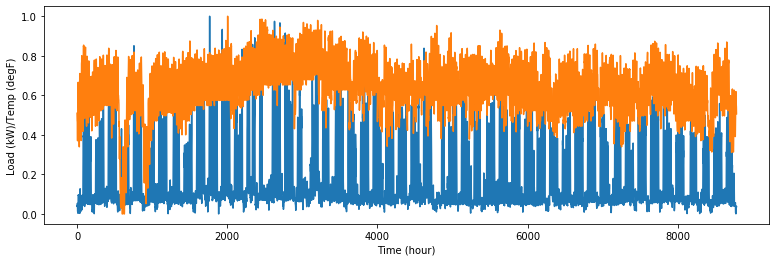

In [30]:
T1 = (T-T.min())/(T.max()-T.min())
Lt1  = (Lt-Lt.min())/(Lt.max()-Lt.min())
plt.figure(figsize=(13,4))
plt.plot(Lt1)
plt.plot(T1)
plt.ylabel('Load (kW)/Temp (degF)')
plt.xlabel('Time (hour)')

### **b) Split into train vs test datasets**

In [31]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,0]  #(starting from row1 to remove nan value) 
trainX = data[1:n,1:] 
testY = data[n:len(data),0]
testX = data[n:len(data),1:]

print(trainY.shape)
print(trainX.shape)
print('=====Outdoor=======Lt-1=======W=======H========Lt====')
for i in range(5):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====Outdoor=======Lt-1=======W=======H========Lt====')
for i in range(5):
  print(testX[i,:], testY[i])

(7026,)
(7026, 4)
=====Outdoor=======Lt-1=======W=======H========Lt====
[0.47519582 0.04069488 0.66666667 0.04347826] 0.038967271331221805
[0.47258486 0.03896727 0.66666667 0.08695652] 0.0383914003263269
[0.46997389 0.0383914  0.66666667 0.13043478] 0.04203858335732796
[0.46475196 0.04203858 0.66666667 0.17391304] 0.036663787311642194
[0.4308094  0.03666379 0.66666667 0.2173913 ] 0.053364046453594396
(1757,)
(1757, 4)
=====Outdoor=======Lt-1=======W=======H========Lt====
[0.63133159 0.14224014 0.33333333 0.82608696] 0.058162971494385256
[0.62663185 0.05816297 0.33333333 0.86956522] 0.055859487474805646
[0.62663185 0.05585949 0.33333333 0.91304348] 0.08215759669833955
[0.60052219 0.0821576  0.33333333 0.95652174] 0.08167770419426049
[0.60052219 0.0816777  0.33333333 1.        ] 0.07860639216815432


# **Step 3: Formulate ANN model**

In [32]:
from keras.optimizers import Adam
opt = Adam(lr=0.005)

model = Sequential()
model.add(Dense(6, activation='sigmoid', input_dim=4))#
model.add(Dense(6, activation='sigmoid'))#
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainY, validation_split=0.1, epochs=50, batch_size=24, verbose=1)

Train on 6323 samples, validate on 703 samples
Epoch 1/50
6323/6323 [==============================] - 1s 93us/step - loss: 0.0372 - val_loss: 0.0215
Epoch 2/50
6323/6323 [==============================] - 0s 54us/step - loss: 0.0202 - val_loss: 0.0073
Epoch 3/50
6323/6323 [==============================] - 0s 54us/step - loss: 0.0053 - val_loss: 0.0028
Epoch 4/50
6323/6323 [==============================] - 0s 53us/step - loss: 0.0036 - val_loss: 0.0027
Epoch 5/50
6323/6323 [==============================] - 0s 54us/step - loss: 0.0035 - val_loss: 0.0027
Epoch 6/50
6323/6323 [==============================] - 0s 51us/step - loss: 0.0034 - val_loss: 0.0026
Epoch 7/50
6323/6323 [==============================] - 0s 49us/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/50
6323/6323 [==============================] - 0s 49us/step - loss: 0.0031 - val_loss: 0.0024
Epoch 9/50
6323/6323 [==============================] - 0s 48us/step - loss: 0.0029 - val_loss: 0.0023
Epoch 10/50
6323/6323 [===

In [33]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
None


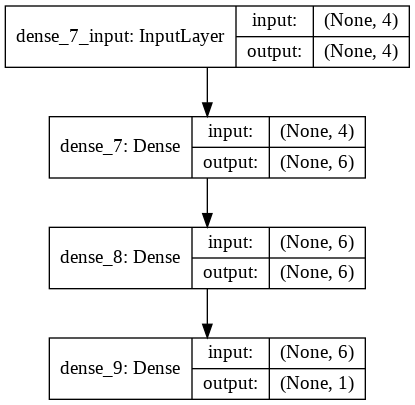

In [34]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# **Step 4: Predict and calculate RMSE**

In [0]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df['Load'].max()-df['Load'].min())+df['Load'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df['Load'].max()-df['Load'].min())+df['Load'].min()  

RMSE= 3.596517893653724
MAPE= 33.929779887742974


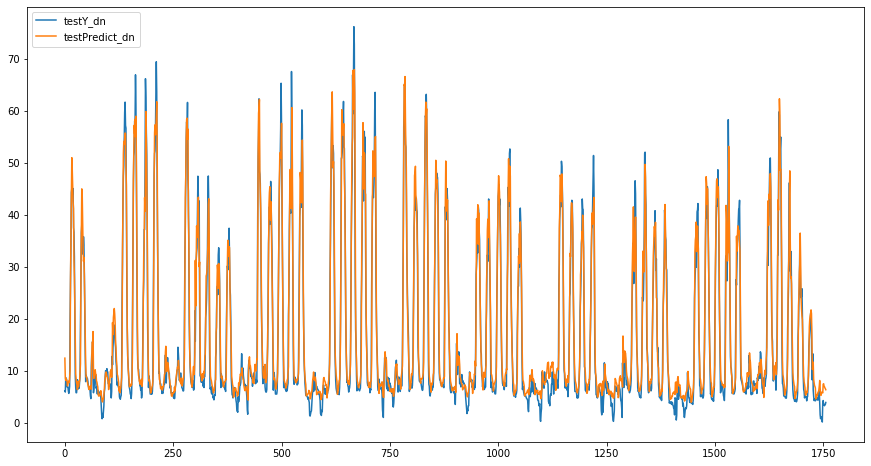

In [36]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

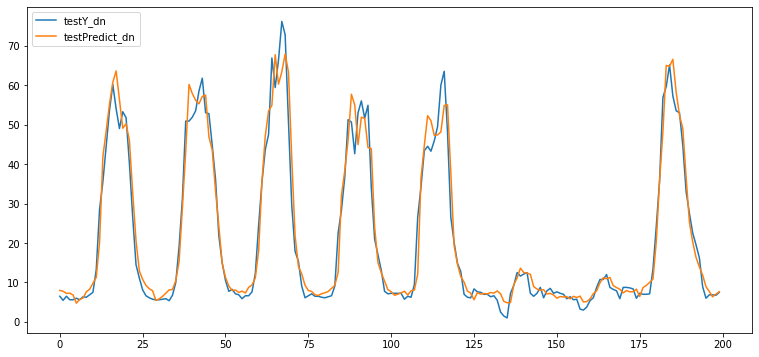

In [37]:
plt.figure(figsize=(13,6))
plt.plot(testY_dn[600:800], label='testY_dn')
plt.plot(testPredict_dn[600:800], label='testPredict_dn')
plt.legend(loc='upper left')

###**Step 5: Check model loss and validation loss**

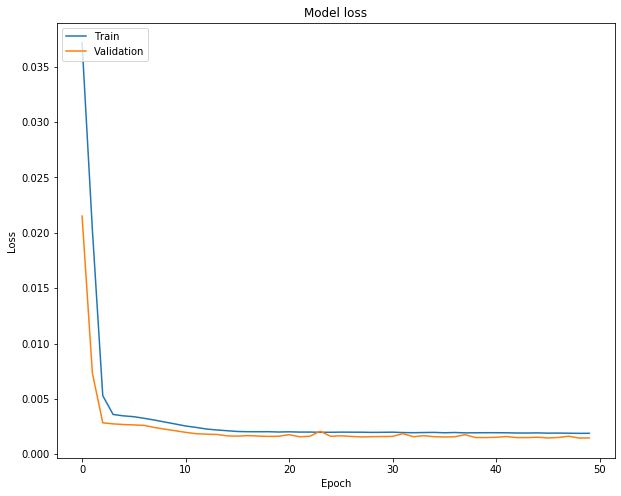

In [38]:
#Check model loss and validation loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()